In [106]:
import platform
import pandas as pd
import sklearn
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [71]:
df = pd.read_csv("C:/Users/User/Downloads/WA_Fn-UseC_-Telco-Customer-Churn (1) (1).csv")
df


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [72]:
df = df.dropna(how="all")  # remove samples with all missing values
df.shape

(7043, 21)

In [73]:
df.fillna

<bound method DataFrame.fillna of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0           7590  Female              0     Yes         No       1   
1           5575    Male              0      No         No      34   
2           3668    Male              0      No         No       2   
3           7795    Male              0      No         No      45   
4           9237  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038        6840    Male              0     Yes        Yes      24   
7039        2234  Female              0     Yes        Yes      72   
7040        4801  Female              0     Yes        Yes      11   
7041        8361    Male              1     Yes         No       4   
7042        3186    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DS

In [74]:
total_charges_filter = df.TotalCharges == " "
df = df[~total_charges_filter]
df.shape

(7032, 21)

In [75]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)

C:\Users\User\AppData\Local\Temp\ipykernel_13160\3612871430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.TotalCharges = pd.to_numeric(df.TotalCharges)


In [76]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032,7032.000000,7032,7032,7032.000000,7032,7032,7032,7032,...,7032,7032,7032,7032,7032,7032,7032,7032.000000,7032.000000,7032
unique,NaN,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,NaN,2
top,NaN,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,NaN,3549,NaN,3639,4933,NaN,6352,3385,3096,3497,...,3094,3472,2809,2781,3875,4168,2365,NaN,NaN,5163
mean,4999.087600,NaN,0.162400,NaN,NaN,32.421786,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.798208,2283.300441,NaN
std,2856.786564,NaN,0.368844,NaN,NaN,24.545260,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.085974,2266.771362,NaN
min,2.000000,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,2574.500000,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.587500,401.450000,NaN
50%,4998.500000,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,7459.000000,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.862500,3794.737500,NaN


In [77]:
categorical_features = [
    "gender",
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod",
]
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
target = "Churn"

In [78]:
df[numerical_features].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


array([[<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>],
       [<AxesSubplot:title={'center':'TotalCharges'}>, <AxesSubplot:>]],
      dtype=object)

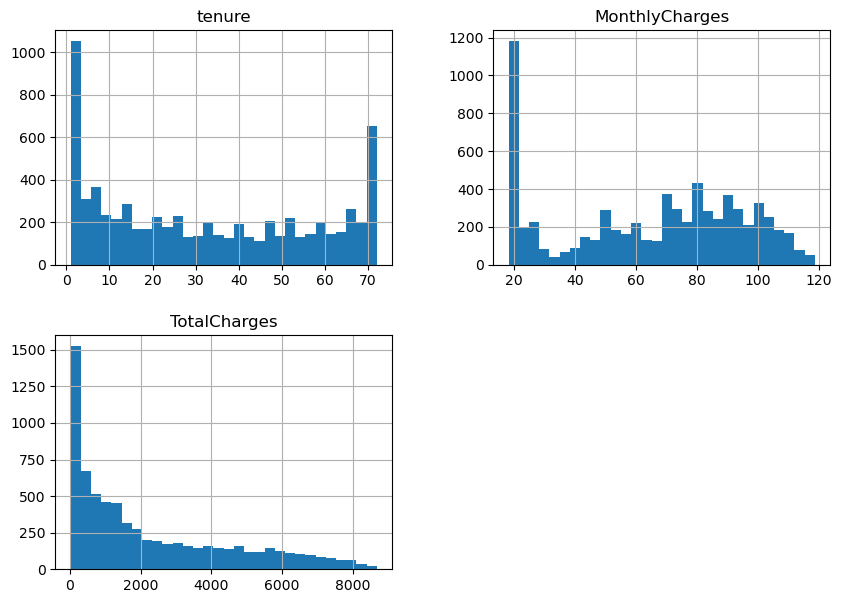

In [79]:
df[numerical_features].hist(bins=30, figsize=(10, 7))

<AxesSubplot:xlabel='Churn', ylabel='count'>

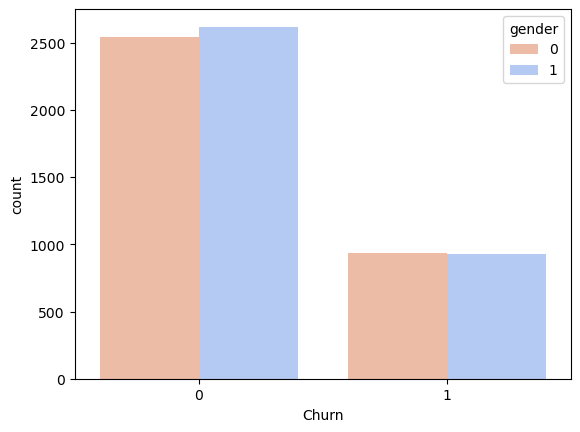

In [109]:
sns.countplot(x='Churn',data=df,hue='gender',palette="coolwarm_r")

<AxesSubplot:xlabel='Churn', ylabel='count'>

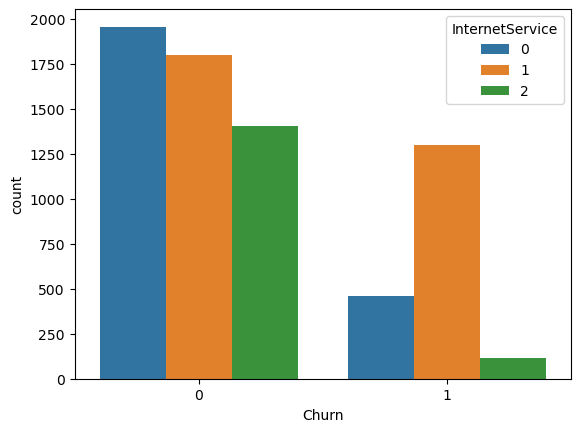

In [110]:
sns.countplot(x='Churn',data=df, hue='InternetService')

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

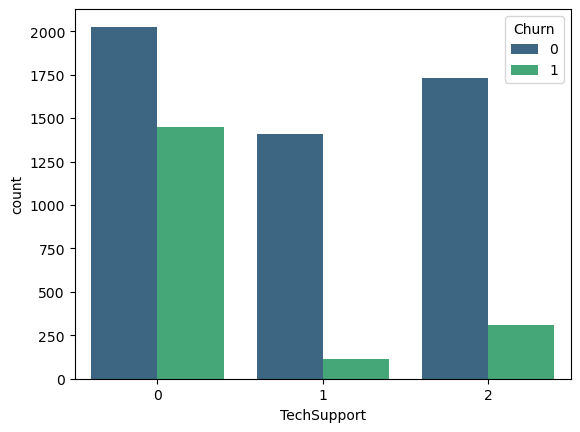

In [111]:
sns.countplot(x='TechSupport',data=df, hue='Churn',palette='viridis')

[Text(0.5, 0, 'Tenure in Months'), Text(0, 0.5, 'Count')]

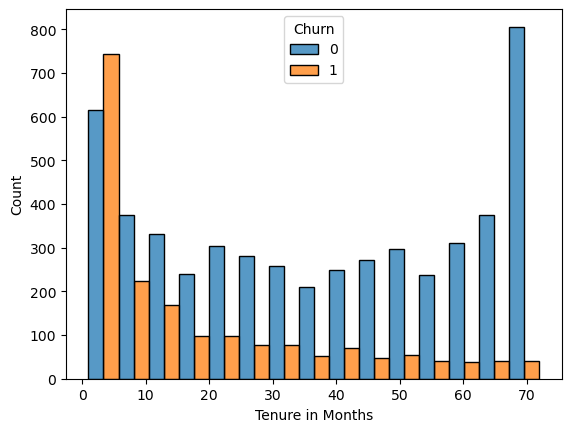

In [112]:
ax = sns.histplot(x = 'tenure', hue = 'Churn', data = df, multiple='dodge')
ax.set(xlabel="Tenure in Months", ylabel = "Count")

In [80]:
from sklearn.preprocessing import LabelEncoder

categorical_feature_names = []
label_encoders = {}
for categorical in categorical_features + [target]:
    label_encoders[categorical] = LabelEncoder()
    df[categorical] = label_encoders[categorical].fit_transform(df[categorical])
    names = label_encoders[categorical].classes_.tolist()
    print('Label encoder %s - values: %s' % (categorical, names))
    if categorical == target:
        continue
    categorical_feature_names.extend([categorical + '_' + str(name) for name in names])

Label encoder gender - values: ['Female', 'Male']
Label encoder SeniorCitizen - values: [0, 1]
Label encoder Partner - values: ['No', 'Yes']
Label encoder Dependents - values: ['No', 'Yes']
Label encoder PhoneService - values: ['No', 'Yes']
Label encoder MultipleLines - values: ['No', 'No phone service', 'Yes']
Label encoder InternetService - values: ['DSL', 'Fiber optic', 'No']
Label encoder OnlineSecurity - values: ['No', 'No internet service', 'Yes']
Label encoder OnlineBackup - values: ['No', 'No internet service', 'Yes']
Label encoder DeviceProtection - values: ['No', 'No internet service', 'Yes']
Label encoder TechSupport - values: ['No', 'No internet service', 'Yes']
Label encoder StreamingTV - values: ['No', 'No internet service', 'Yes']
Label encoder StreamingMovies - values: ['No', 'No internet service', 'Yes']
Label encoder Contract - values: ['Month-to-month', 'One year', 'Two year']
Label encoder PaperlessBilling - values: ['No', 'Yes']
Label encoder PaymentMethod - values

C:\Users\User\AppData\Local\Temp\ipykernel_13160\4001516914.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical] = label_encoders[categorical].fit_transform(df[categorical])


In [81]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [92]:
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features
X.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.759332,0.0,0.0,1.0,0.0,0.000000,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.115423,0.001275
1,0.557690,1.0,0.0,0.0,0.0,0.464789,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.385075,0.215867
2,0.366857,1.0,0.0,0.0,0.0,0.014085,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.354229,0.010310
3,0.779846,1.0,0.0,0.0,0.0,0.619718,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.239303,0.210241
4,0.924147,0.0,0.0,0.0,0.0,0.014085,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.521891,0.015330


In [93]:
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [94]:
X=df.drop('Churn', axis=1)
y=df['Churn']

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [96]:
from sklearn.linear_model import LogisticRegression 
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
prediction_logreg=logreg.predict(X_test)
print(accuracy_score(y_test,prediction_logreg))

0.7919431279620853


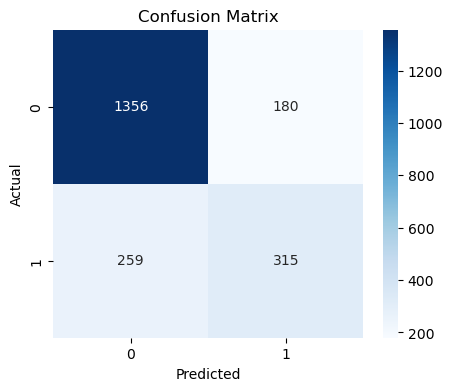

In [113]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test,prediction_logreg )
plt.figure(figsize=(5, 4))
sns.heatmap(CM, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [98]:
# Create Random Forest model with 50 trees
rf_50 = RandomForestClassifier(n_estimators=50, random_state=42)
rf_50.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [99]:
# Predict target variable for test data
y_pred_50 = rf_50.predict(X_test)

In [100]:
# Calculate accuracy score for 50 trees
accuracy_50 = accuracy_score(y_test, y_pred_50)
print("Accuracy with 50 trees:", accuracy_50)

Accuracy with 50 trees: 0.7819905213270142


In [101]:
# Create Random Forest model with 150 trees
rf_150 = RandomForestClassifier(n_estimators=150, random_state=42)
rf_150.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [102]:
# Predict target variable for test data
y_pred_150 = rf_150.predict(X_test)

In [103]:
# Calculate the accuracy score for 150 trees
accuracy_150 = accuracy_score(y_test, y_pred_150)
print("Accuracy with 150 trees:", accuracy_150)

Accuracy with 150 trees: 0.7890995260663507


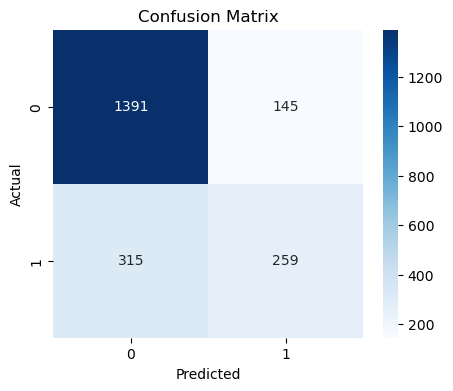

In [108]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred_50)
plt.figure(figsize=(5, 4))
sns.heatmap(CM, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()